In [1]:
# Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

### **Explorar el dataset spotify_2023**

In [2]:
# Cargar los datos como DataFrame
spotify_2023 = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_2023

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [3]:
# Observar las columnas presentes en el set de datos
spotify_2023.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Tomando en cuenta las columnas presentes en el set de datos, se pueden definir las columnas de la siguiente forma:

- **track_name:** *nombre de la canción*
- **artist(s)_name:** *nombre del o los artistas de la canción*
- **artist_count:** *número de artistas que contribuyen a la canción*
- **released_year:** *año en el cuál se lanzó la canción*
- **released_month:** *mes en el cual se lanzó la canción*
- **released_day:** *día en el cual se lanzó la canción*
- **in_spotify_playlist** *número de listas de reproducción donde se incluye la canción en Spotify*
- **in_spotify_charts:** *precencia y rango de la canción en las listas de éxito de Spotify*
- **streams:** *número total de reproducciones en Spotify*
- **in_apple_playlists:** *número de listas de reproducción donde se incluye la canción en Apple Music*
- **in_apple_charts:** *precencia y rango de la canción en las listas de éxito de Apple Music*
- **in_deezer_playlists:** *número de listas de reproducción donde se incluye la canción en Dreezer*
- **in_deezer_charts:** *precencia y rango de la canción en las listas de éxito de Apple Music*
- **in_shazam_charts:** *presencia y rango de la canción en las listas de éxito de shazam*
- **bpm:** *pulsaciones por minuto, una medida de tiempo de la canción*
- **key:** *tono de la canción*
- **mode:** *modo de la canción, (mayor o menor)*
- **danceability_%:** *porcentaje que indica que tan acta es la canción para bailar*
- **valence_%:** *positividad del contenido de la canción*
- **energy_%:** *percepción del nivel de energía de la canción*
- **acousticness_%:** *cantidad de sonidos acústicos de la canción*
- **instrumentalness_%:** *cantidad de contenido instrumental de la canción*
- **liveness_%:** *presencia de elementos de actuación en vivo*
- **speechiness_%:** *cantidad de palabras habladas en la canción*

Para fines prácticos se eliminaran las columnas 'track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'key' y 'mode'. Esto debido a que se desea estudiar las tendencias presentes en los atributos de las canciones más ecuchadas.

In [4]:
# Eliminar las columnas 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts' y 'in_shazam_charts'.
spotify_2023.drop(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                   'in_deezer_charts', 'in_shazam_charts', 'key', 'mode'], axis = 1, inplace = True)
spotify_2023.head()

released_year  released_month  released_day  bpm  danceability_%  \
0           2023               7            14  125              80   
1           2023               3            23   92              71   
2           2023               6            30  138              51   
3           2019               8            23  170              55   
4           2023               5            18  144              65   

   valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0         89        83              31                   0           8   
1         61        74               7                   0          10   
2         32        53              17                   0          31   
3         58        72              11                   0          11   
4         23        80              14                  63          11   

   speechiness_%  
0              4  
1              4  
2              6  
3             15  
4              6

In [5]:
# Observar la cantidad de valores únicos por columnas
spotify_2023.nunique()

released_year          50
released_month         12
released_day           31
bpm                   124
danceability_%         72
valence_%              94
energy_%               80
acousticness_%         98
instrumentalness_%     39
liveness_%             68
speechiness_%          48
dtype: int64

In [6]:
# Mostrar duplicados
spotify_2023.duplicated().sum()

0

In [7]:
# Información del Dataframe
spotify_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   released_year       953 non-null    int64
 1   released_month      953 non-null    int64
 2   released_day        953 non-null    int64
 3   bpm                 953 non-null    int64
 4   danceability_%      953 non-null    int64
 5   valence_%           953 non-null    int64
 6   energy_%            953 non-null    int64
 7   acousticness_%      953 non-null    int64
 8   instrumentalness_%  953 non-null    int64
 9   liveness_%          953 non-null    int64
 10  speechiness_%       953 non-null    int64
dtypes: int64(11)
memory usage: 82.0 KB


No se encuentran columnas duplicadas, ni valores nulos, así que se procede a transformar los datos de tiempo

In [8]:
# Guardar los datos limpios
spotify_2023.to_csv('spotify_clean.csv')

### **Análisis Exploratorio de los Datos**

In [9]:
# Cargar el dataframe limpio
spotify_clean = pd.read_csv('spotify_clean.csv')
spotify_clean.drop('Unnamed: 0', axis = 1, inplace = True)
spotify_clean

released_year  released_month  released_day  bpm  danceability_%  \
0             2023               7            14  125              80   
1             2023               3            23   92              71   
2             2023               6            30  138              51   
3             2019               8            23  170              55   
4             2023               5            18  144              65   
..             ...             ...           ...  ...             ...   
948           2022              11             3  144              60   
949           2022              10            21  166              42   
950           2022              11             3   92              80   
951           2022              10            20   97              82   
952           2022              11             4   90              61   

     valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0           89        83              31                   0           8   
1           61        74               7                   0          10   
2           32        53              17                   0          31   
3           58        72              11                   0          11   
4           23        80              14                  63          11   
..         ...       ...             ...                 ...         ...   
948         24        39              57                   0           8   
949          7        24              83                   1          12   
950         81        67               4                   0           8   
951         67        77               8                   0          12   
952         32        67              15                   0          11   

     speechiness_%  
0                4  
1                4  
2                6  
3               15  
4                6  
..             ...  
948              3  
949              6  
950              6  
951              5  
952              5  

[953 rows x 11 columns]

In [10]:
# Crear la columna 'released_date' a partir de las columnas released_year	released_month	released_day
spotify_clean['released_date'] = pd.to_datetime(dict(year=spotify_clean.released_year, month=spotify_clean.released_month, day=spotify_clean.released_day))
spotify_clean.head()

released_year  released_month  released_day  bpm  danceability_%  \
0           2023               7            14  125              80   
1           2023               3            23   92              71   
2           2023               6            30  138              51   
3           2019               8            23  170              55   
4           2023               5            18  144              65   

   valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0         89        83              31                   0           8   
1         61        74               7                   0          10   
2         32        53              17                   0          31   
3         58        72              11                   0          11   
4         23        80              14                  63          11   

   speechiness_% released_date  
0              4    2023-07-14  
1              4    2023-03-23  
2              6    2023-06-30  
3             15    2019-08-23  
4              6    2023-05-18

In [11]:
# Observar la información de los datos
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   released_year       953 non-null    int64         
 1   released_month      953 non-null    int64         
 2   released_day        953 non-null    int64         
 3   bpm                 953 non-null    int64         
 4   danceability_%      953 non-null    int64         
 5   valence_%           953 non-null    int64         
 6   energy_%            953 non-null    int64         
 7   acousticness_%      953 non-null    int64         
 8   instrumentalness_%  953 non-null    int64         
 9   liveness_%          953 non-null    int64         
 10  speechiness_%       953 non-null    int64         
 11  released_date       953 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(11)
memory usage: 89.5 KB


In [12]:
# Eliminar las columnas 'released_year', 'released_month', 'released_day'
spotify_clean.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
spotify_clean.head()

bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0  125              80         89        83              31   
1   92              71         61        74               7   
2  138              51         32        53              17   
3  170              55         58        72              11   
4  144              65         23        80              14   

   instrumentalness_%  liveness_%  speechiness_% released_date  
0                   0           8              4    2023-07-14  
1                   0          10              4    2023-03-23  
2                   0          31              6    2023-06-30  
3                   0          11             15    2019-08-23  
4                  63          11              6    2023-05-18

In [13]:
# Establecer 'released_date' como indice
spotify_clean.set_index('released_date', inplace=True)

# re-muestrear con frecuencia anual
spotify_resampled_monthly = spotify_clean.resample('M').mean()

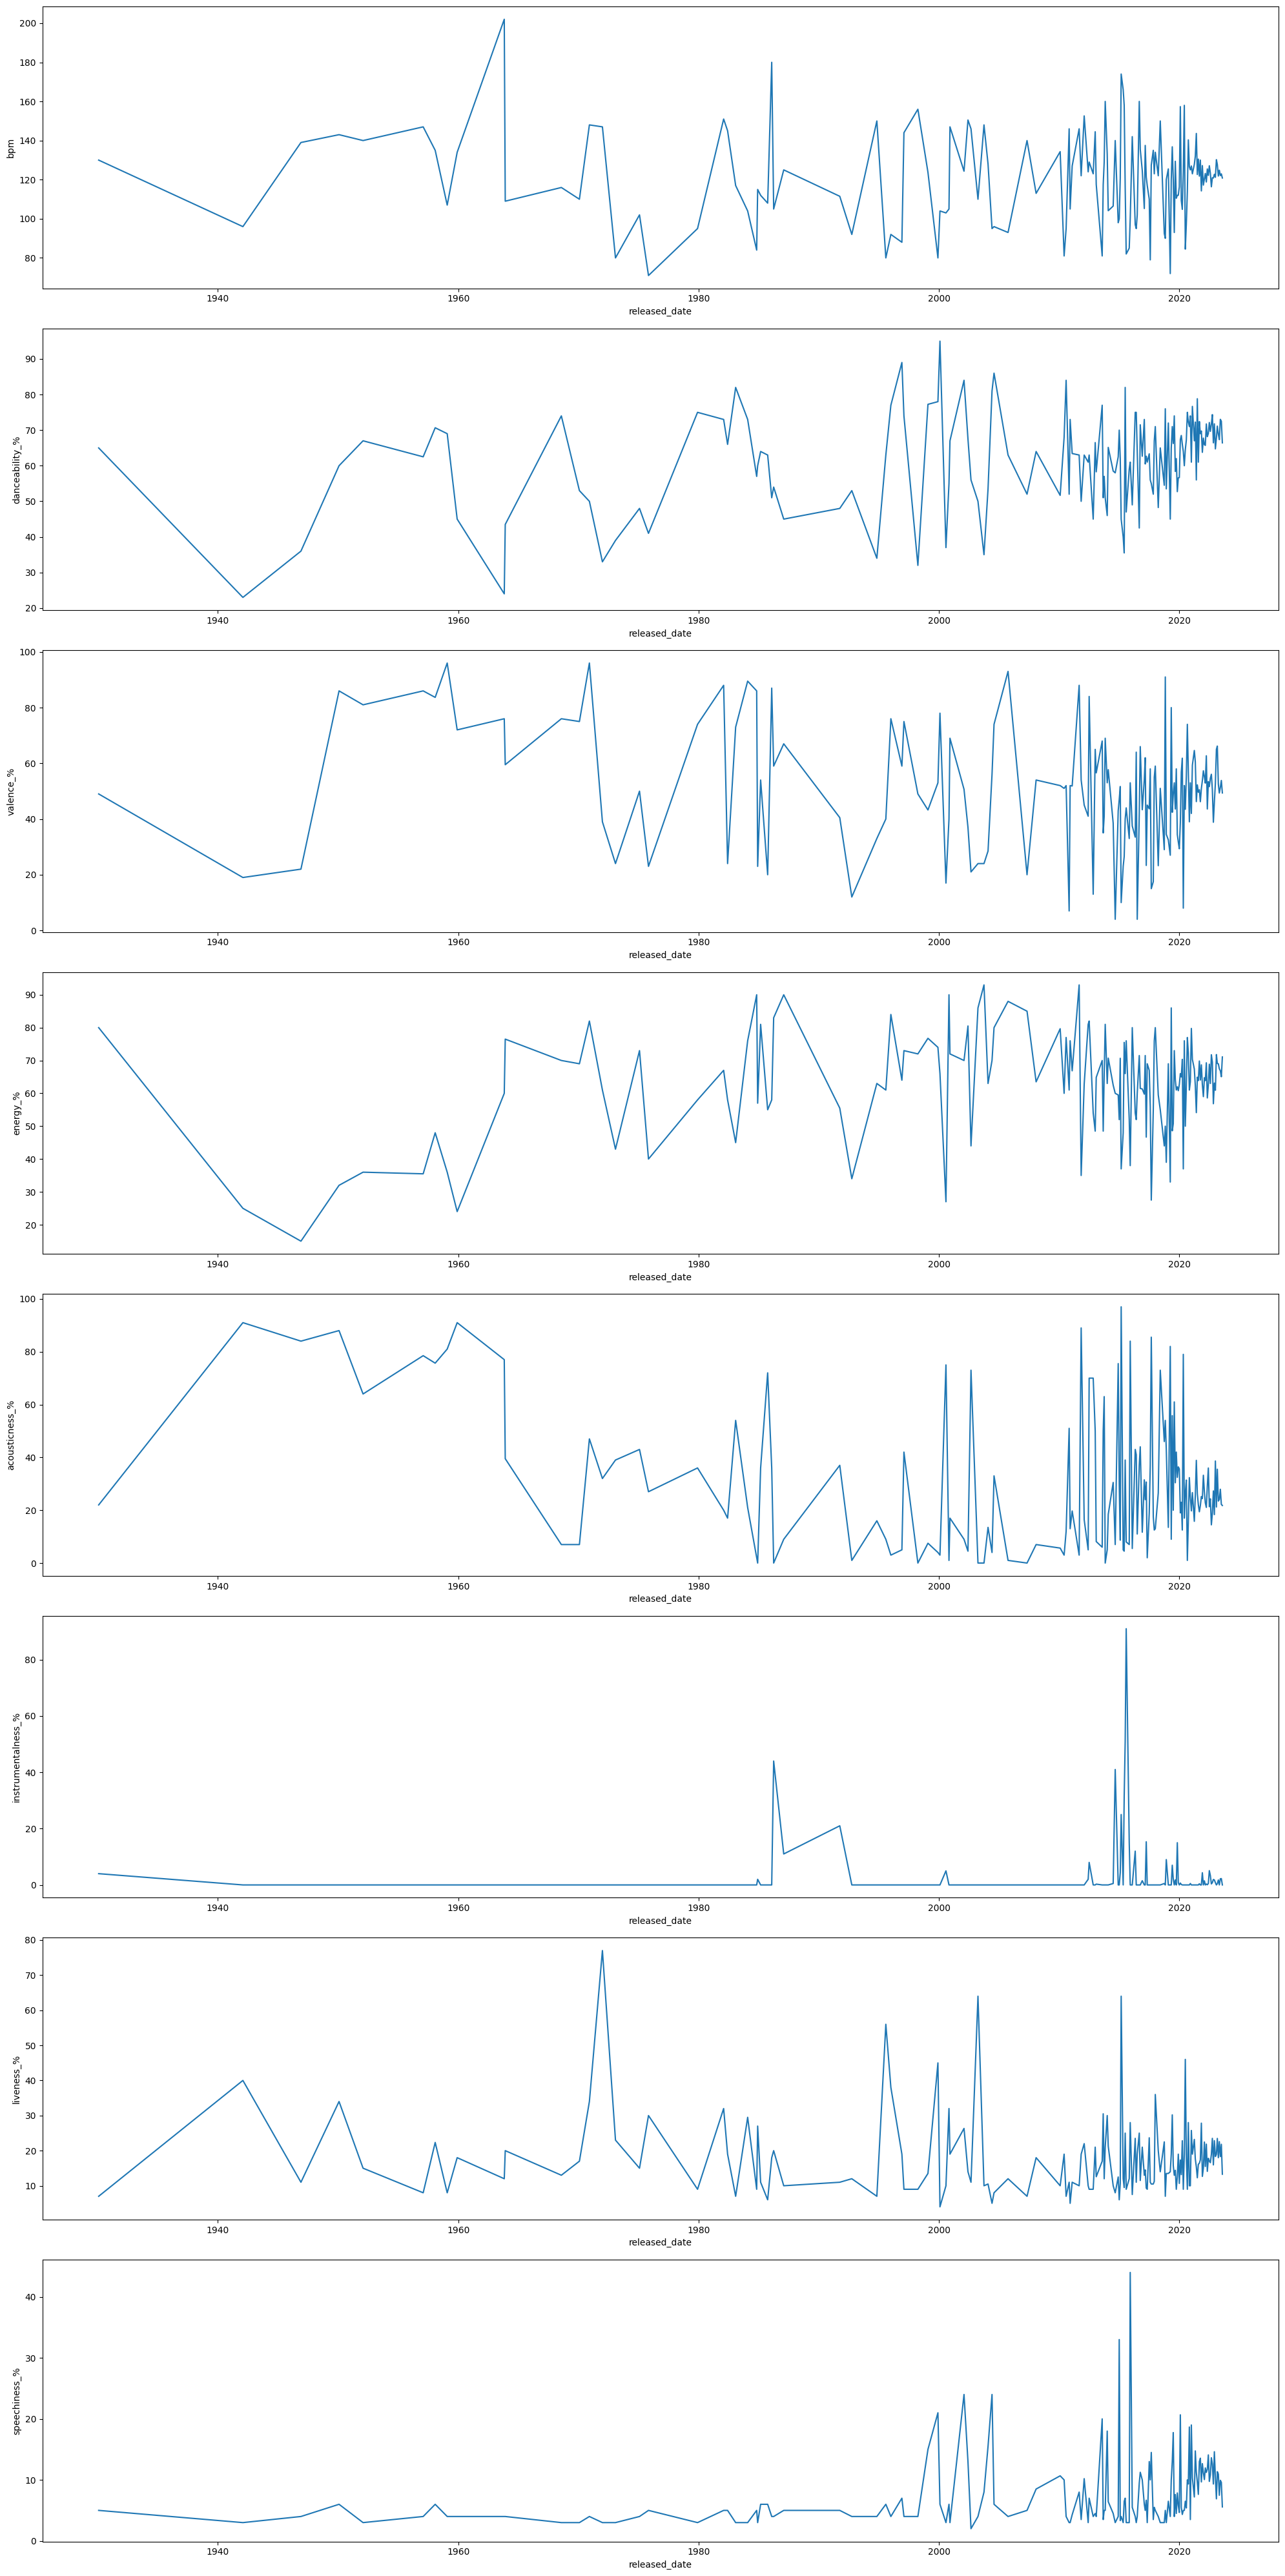

In [14]:
# Observar la evolución de los atributos músicales en el tiempo

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_monthly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[1], data = spotify_resampled_monthly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[2], data = spotify_resampled_monthly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[3], data = spotify_resampled_monthly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[4], data = spotify_resampled_monthly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[5], data = spotify_resampled_monthly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[6], data = spotify_resampled_monthly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[7], data = spotify_resampled_monthly, x = 'released_date', y = 'speechiness_%')

plt.tight_layout()

plt.show()

**Nota:**
- Se pueden observar altos y bajos en las diferentes variables, sin embargo la diferenciación en los mismos es que a lo largo del tiempo cada variable se va a ajustando a un porcentaje determinado.

#### ***Analisis de tendencias***

In [15]:
spotify_resampled_monthly = spotify_resampled_monthly.dropna()

total_observations_bpm = len(spotify_resampled_monthly['bpm'])
total_observations_danceability = len(spotify_resampled_monthly['danceability_%'])
total_observations_valence = len(spotify_resampled_monthly['valence_%'])
total_observations_energy = len(spotify_resampled_monthly['energy_%'])
total_observations_acousticness = len(spotify_resampled_monthly['acousticness_%'])
total_observations_instrumentalness = len(spotify_resampled_monthly['instrumentalness_%'])
total_observations_liveness = len(spotify_resampled_monthly['liveness_%'])
total_observations_speechiness = len(spotify_resampled_monthly['speechiness_%'])

number_of_cycles = 50

period_bpm = total_observations_bpm // number_of_cycles
period_danceability = total_observations_danceability // number_of_cycles
period_valence = total_observations_valence // number_of_cycles
period_energy = total_observations_energy // number_of_cycles
period_acousticness = total_observations_acousticness // number_of_cycles
period_instrumentalness = total_observations_instrumentalness // number_of_cycles
period_liveness = total_observations_liveness // number_of_cycles
period_speechiness = total_observations_speechiness // number_of_cycles

decomposition_bpm = seasonal_decompose(spotify_resampled_monthly['bpm'], period = period_bpm)
decomposition_danceability = seasonal_decompose(spotify_resampled_monthly['danceability_%'], period = period_danceability)
decomposition_valence = seasonal_decompose(spotify_resampled_monthly['valence_%'], period = period_valence)
decomposition_energy = seasonal_decompose(spotify_resampled_monthly['energy_%'], period = period_energy)
decomposition_acousticness = seasonal_decompose(spotify_resampled_monthly['acousticness_%'], period = period_acousticness)
decomposition_instrumentalness = seasonal_decompose(spotify_resampled_monthly['instrumentalness_%'], period = period_instrumentalness)
decomposition_liveness = seasonal_decompose(spotify_resampled_monthly['liveness_%'], period = period_liveness)
decomposition_speechiness = seasonal_decompose(spotify_resampled_monthly['speechiness_%'], period = period_speechiness)

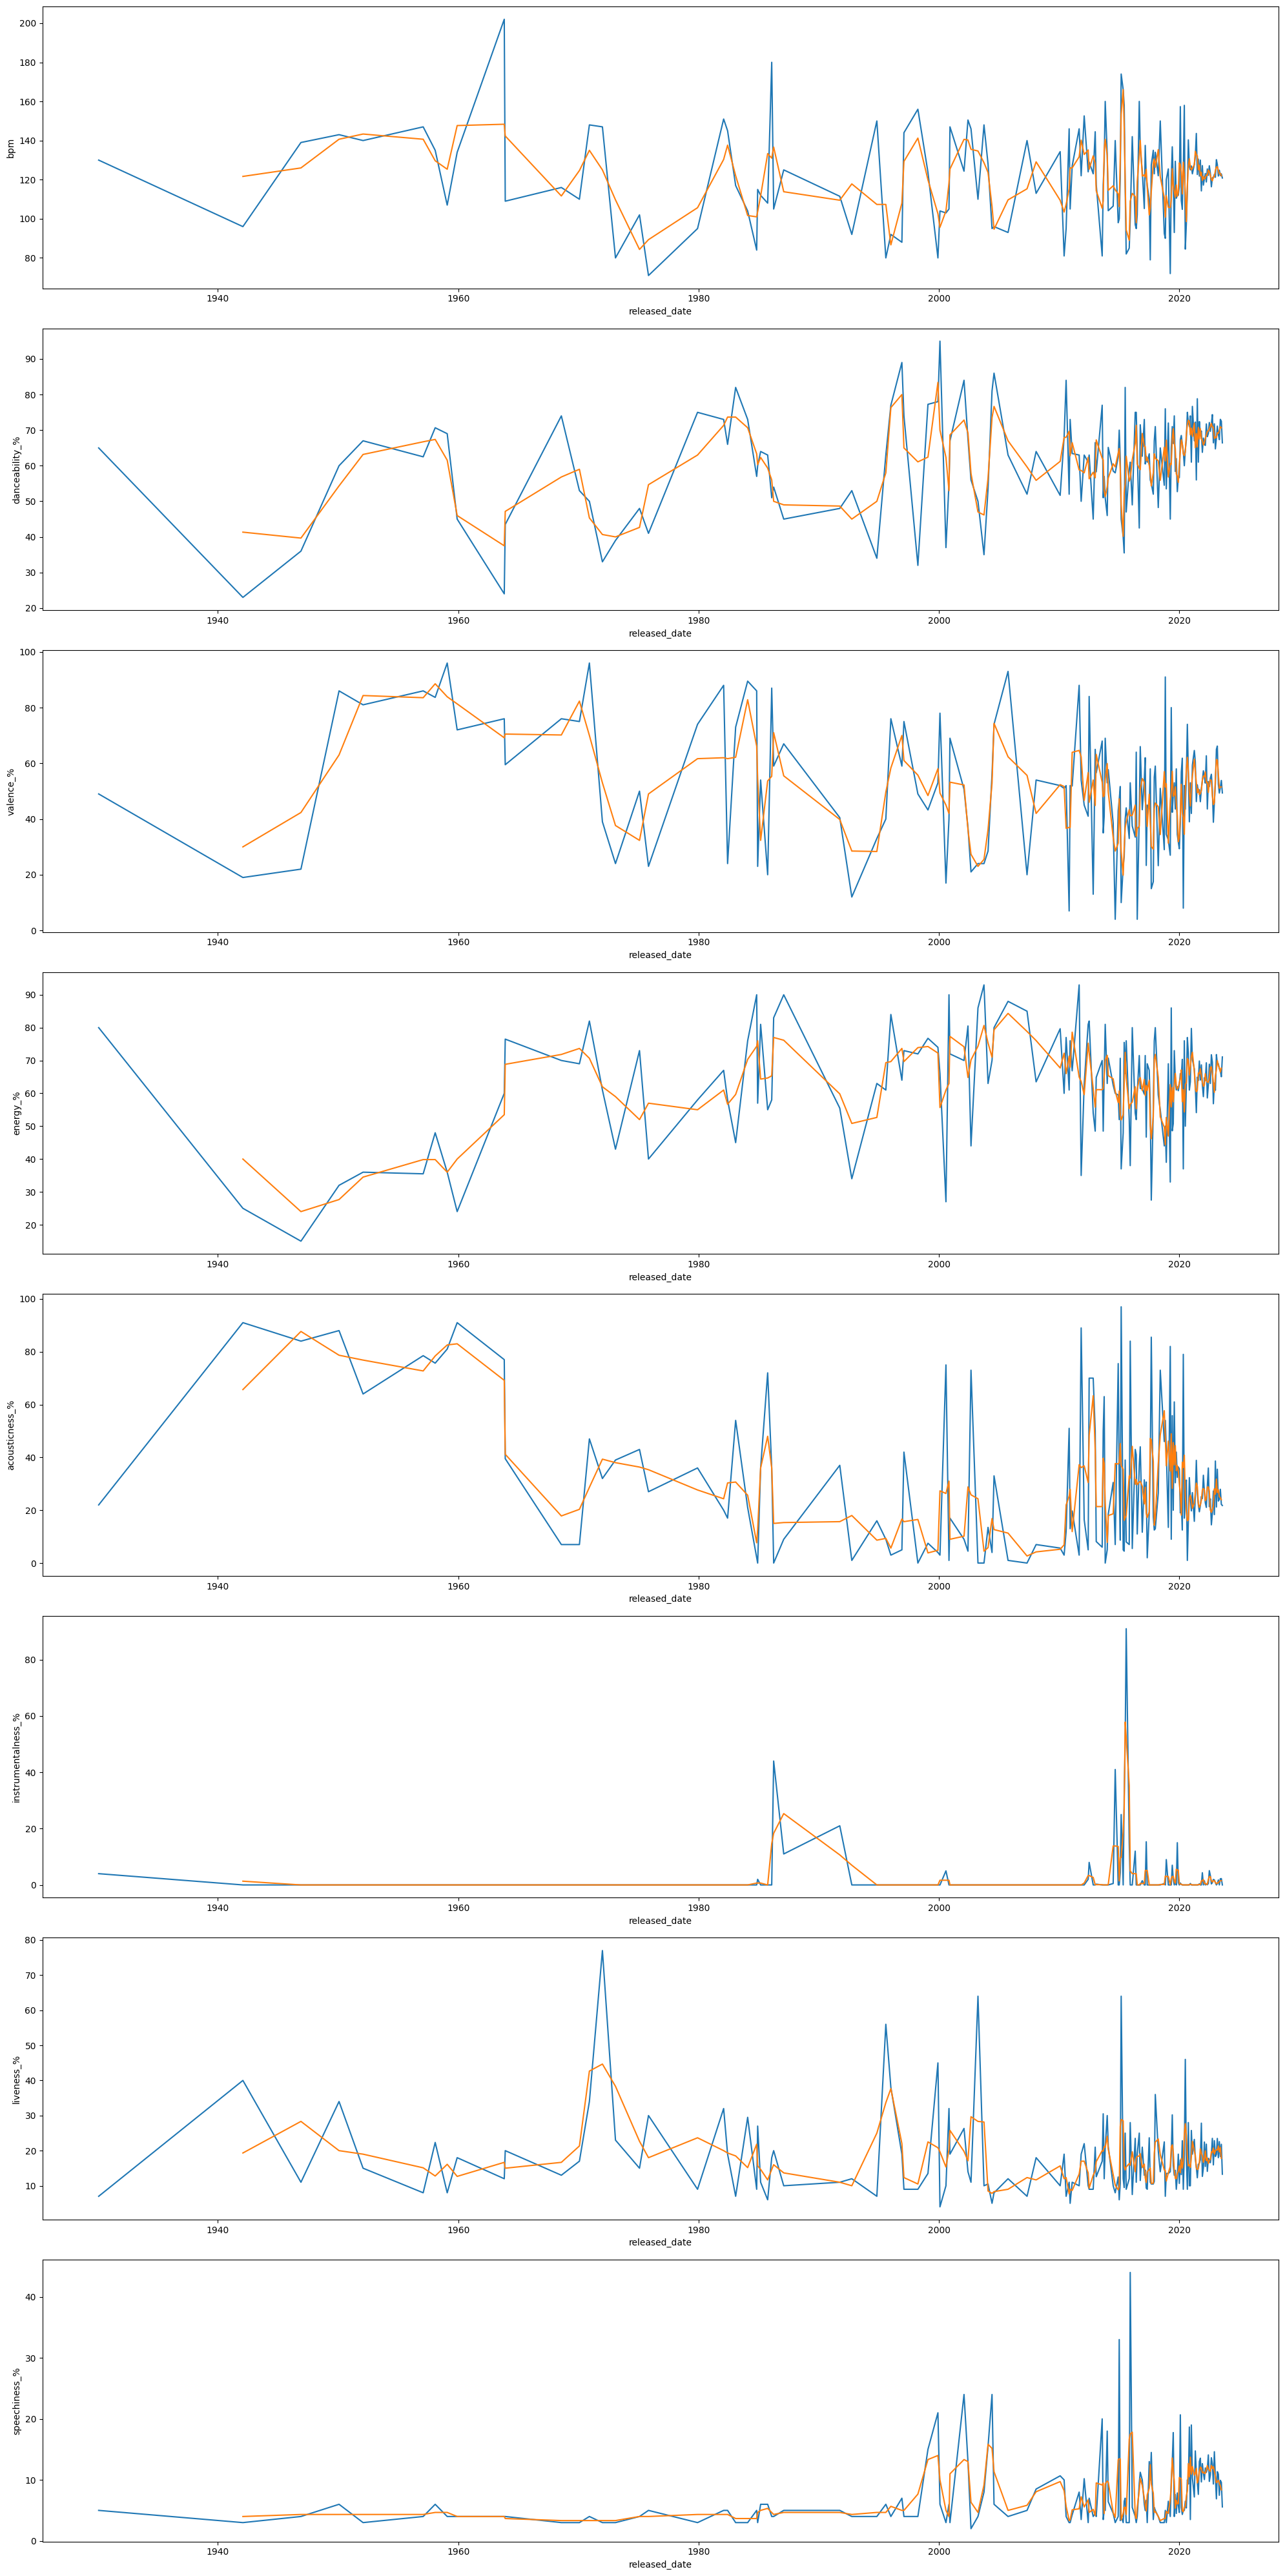

In [16]:
trend_bpm = decomposition_bpm.trend
trend_danceability = decomposition_danceability.trend
trend_valence = decomposition_valence.trend
trend_energy = decomposition_energy.trend
trend_acousticness = decomposition_acousticness.trend
trend_instrumentalness = decomposition_instrumentalness.trend
trend_liveness = decomposition_liveness.trend
trend_speechiness = decomposition_speechiness.trend

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_monthly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = trend_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_monthly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = trend_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_monthly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = trend_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_monthly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = trend_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_monthly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = trend_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_monthly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = trend_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_monthly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = trend_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_monthly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = trend_speechiness)

plt.tight_layout()

plt.show()

#### ***Análisis Estacional***

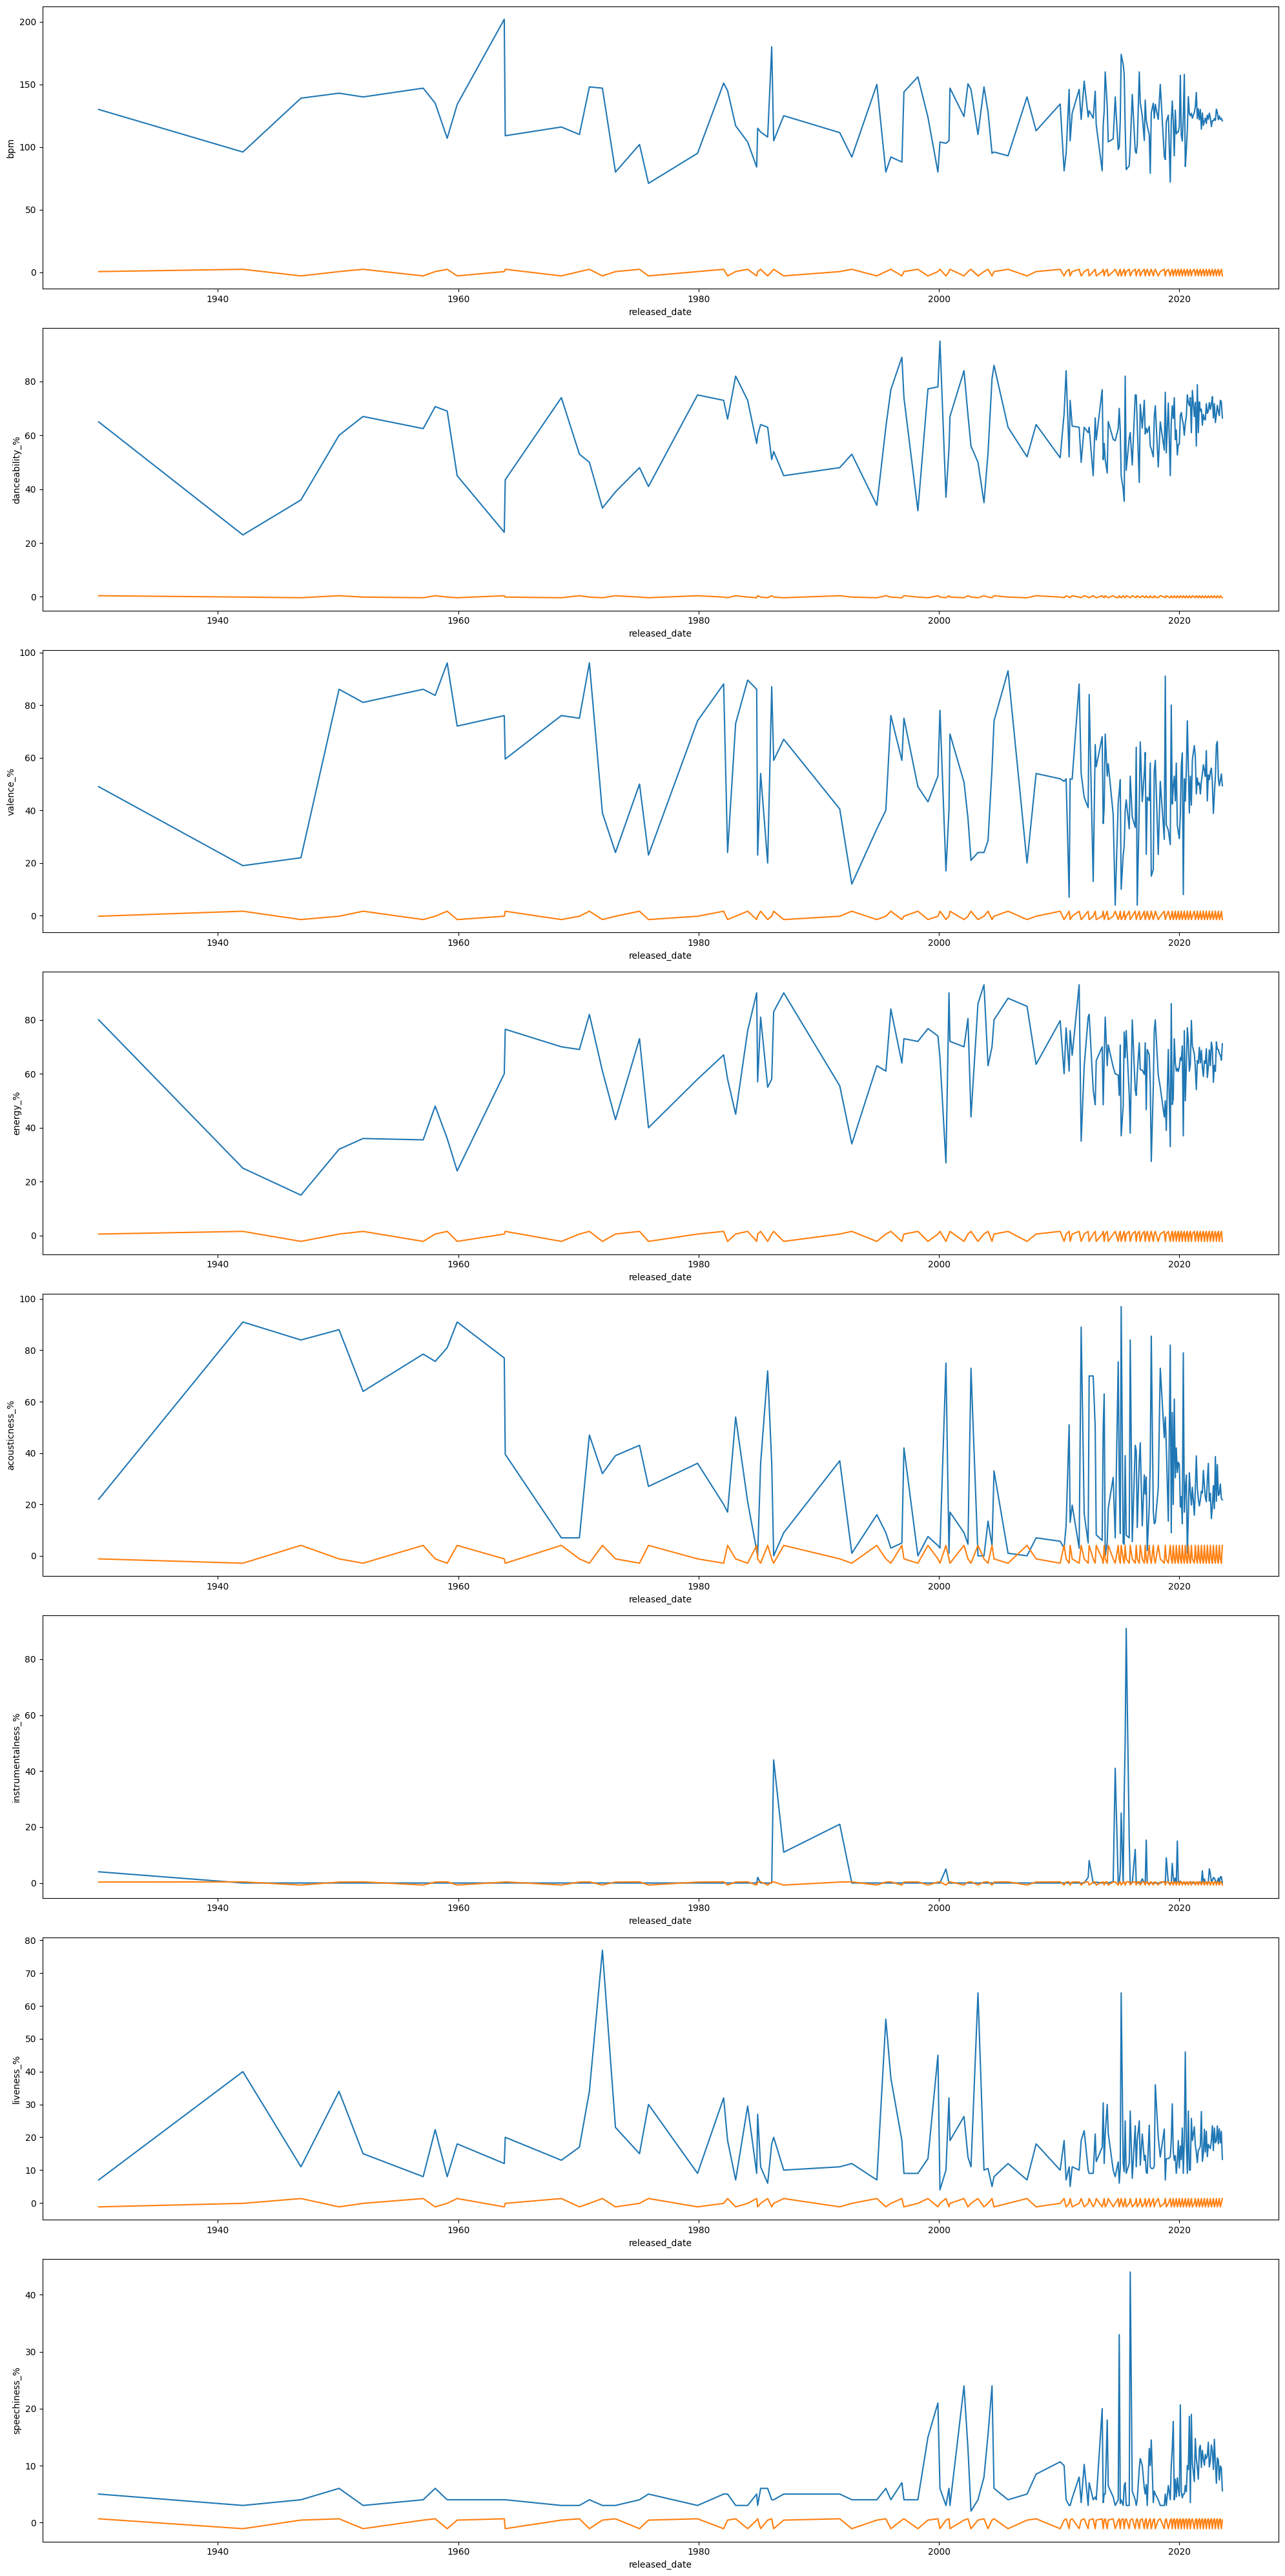

In [17]:
seasonal_bpm = decomposition_bpm.seasonal
seasonal_danceability = decomposition_danceability.seasonal
seasonal_valence = decomposition_valence.seasonal
seasonal_energy = decomposition_energy.seasonal
seasonal_acousticness = decomposition_acousticness.seasonal
seasonal_instrumentalness = decomposition_instrumentalness.seasonal
seasonal_liveness = decomposition_liveness.seasonal
seasonal_speechiness = decomposition_speechiness.seasonal

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_monthly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = seasonal_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_monthly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = seasonal_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_monthly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = seasonal_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_monthly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = seasonal_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_monthly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = seasonal_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_monthly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = seasonal_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_monthly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = seasonal_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_monthly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = seasonal_speechiness)

plt.tight_layout()

plt.show()

In [18]:
# Evaluar estacionalidad de la serie de tiempo

# ADF test for 'bpm'
result_bpm = adfuller(spotify_resampled_monthly['bpm'])
print('ADF Statistic (BPM):', result_bpm[0])
print('p-value (BPM):', result_bpm[1])
print('Critical Values (BPM):', result_bpm[4],'\n')

# ADF test for 'danceability_%'
result_danceability = adfuller(spotify_resampled_monthly['danceability_%'])
print('ADF Statistic (danceability_%):', result_danceability[0])
print('p-value (danceability_%):', result_danceability[1])
print('Critical Values (danceability_%):', result_danceability[4],'\n')

# ADF test for 'valence_%'
result_valence = adfuller(spotify_resampled_monthly['valence_%'])
print('ADF Statistic (valence_%):', result_valence[0])
print('p-value (valence_%):', result_valence[1])
print('Critical Values (valence_%):', result_valence[4],'\n')

# ADF test for 'energy_%'
result_energy = adfuller(spotify_resampled_monthly['energy_%'])
print('ADF Statistic (energy_%):', result_energy[0])
print('p-value (energy_%):', result_energy[1])
print('Critical Values (energy_%):', result_energy[4],'\n')

# ADF test for 'acousticness_%'
result_acousticness = adfuller(spotify_resampled_monthly['acousticness_%'])
print('ADF Statistic (acousticness_%):', result_acousticness[0])
print('p-value (acousticness_%):', result_acousticness[1])
print('Critical Values (acousticness_%):', result_acousticness[4],'\n')

# ADF test for 'instrumentalness_%'
result_instrumentalness = adfuller(spotify_resampled_monthly['instrumentalness_%'])
print('ADF Statistic (instrumentalness_%):', result_instrumentalness[0])
print('p-value (instrumentalness_%):', result_instrumentalness[1])
print('Critical Values (instrumentalness_%):', result_instrumentalness[4],'\n')

# ADF test for 'liveness_%'
result_liveness = adfuller(spotify_resampled_monthly['liveness_%'])
print('ADF Statistic (liveness_%):', result_liveness[0])
print('p-value (liveness_%):', result_liveness[1])
print('Critical Values (liveness_%):', result_liveness[4],'\n')

# ADF test for 'speechiness_%'
result_speechiness = adfuller(spotify_resampled_monthly['speechiness_%'])
print('ADF Statistic (speechiness_%):', result_speechiness[0])
print('p-value (speechiness_%):', result_speechiness[1])
print('Critical Values (speechiness_%):', result_speechiness[4])

ADF Statistic (BPM): -6.274446264506041
p-value (BPM): 3.931768541660472e-08
Critical Values (BPM): {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5767469641683105} 

ADF Statistic (danceability_%): -4.399443072637063
p-value (danceability_%): 0.000297507000480054
Critical Values (danceability_%): {'1%': -3.472703119504854, '5%': -2.880131672353732, '10%': -2.5766826861130268} 

ADF Statistic (valence_%): -10.87083238054625
p-value (valence_%): 1.3698653295879938e-19
Critical Values (valence_%): {'1%': -3.471633386932248, '5%': -2.8796651107461972, '10%': -2.576433647235832} 

ADF Statistic (energy_%): -10.746917038178065
p-value (energy_%): 2.726893639397566e-19
Critical Values (energy_%): {'1%': -3.471633386932248, '5%': -2.8796651107461972, '10%': -2.576433647235832} 

ADF Statistic (acousticness_%): -3.959411385645447
p-value (acousticness_%): 0.0016386110721758353
Critical Values (acousticness_%): {'1%': -3.4729792729247793, '5%': -2.8802520918255534, '10%': -2.5

#### ***Analisis de Variabilidad***

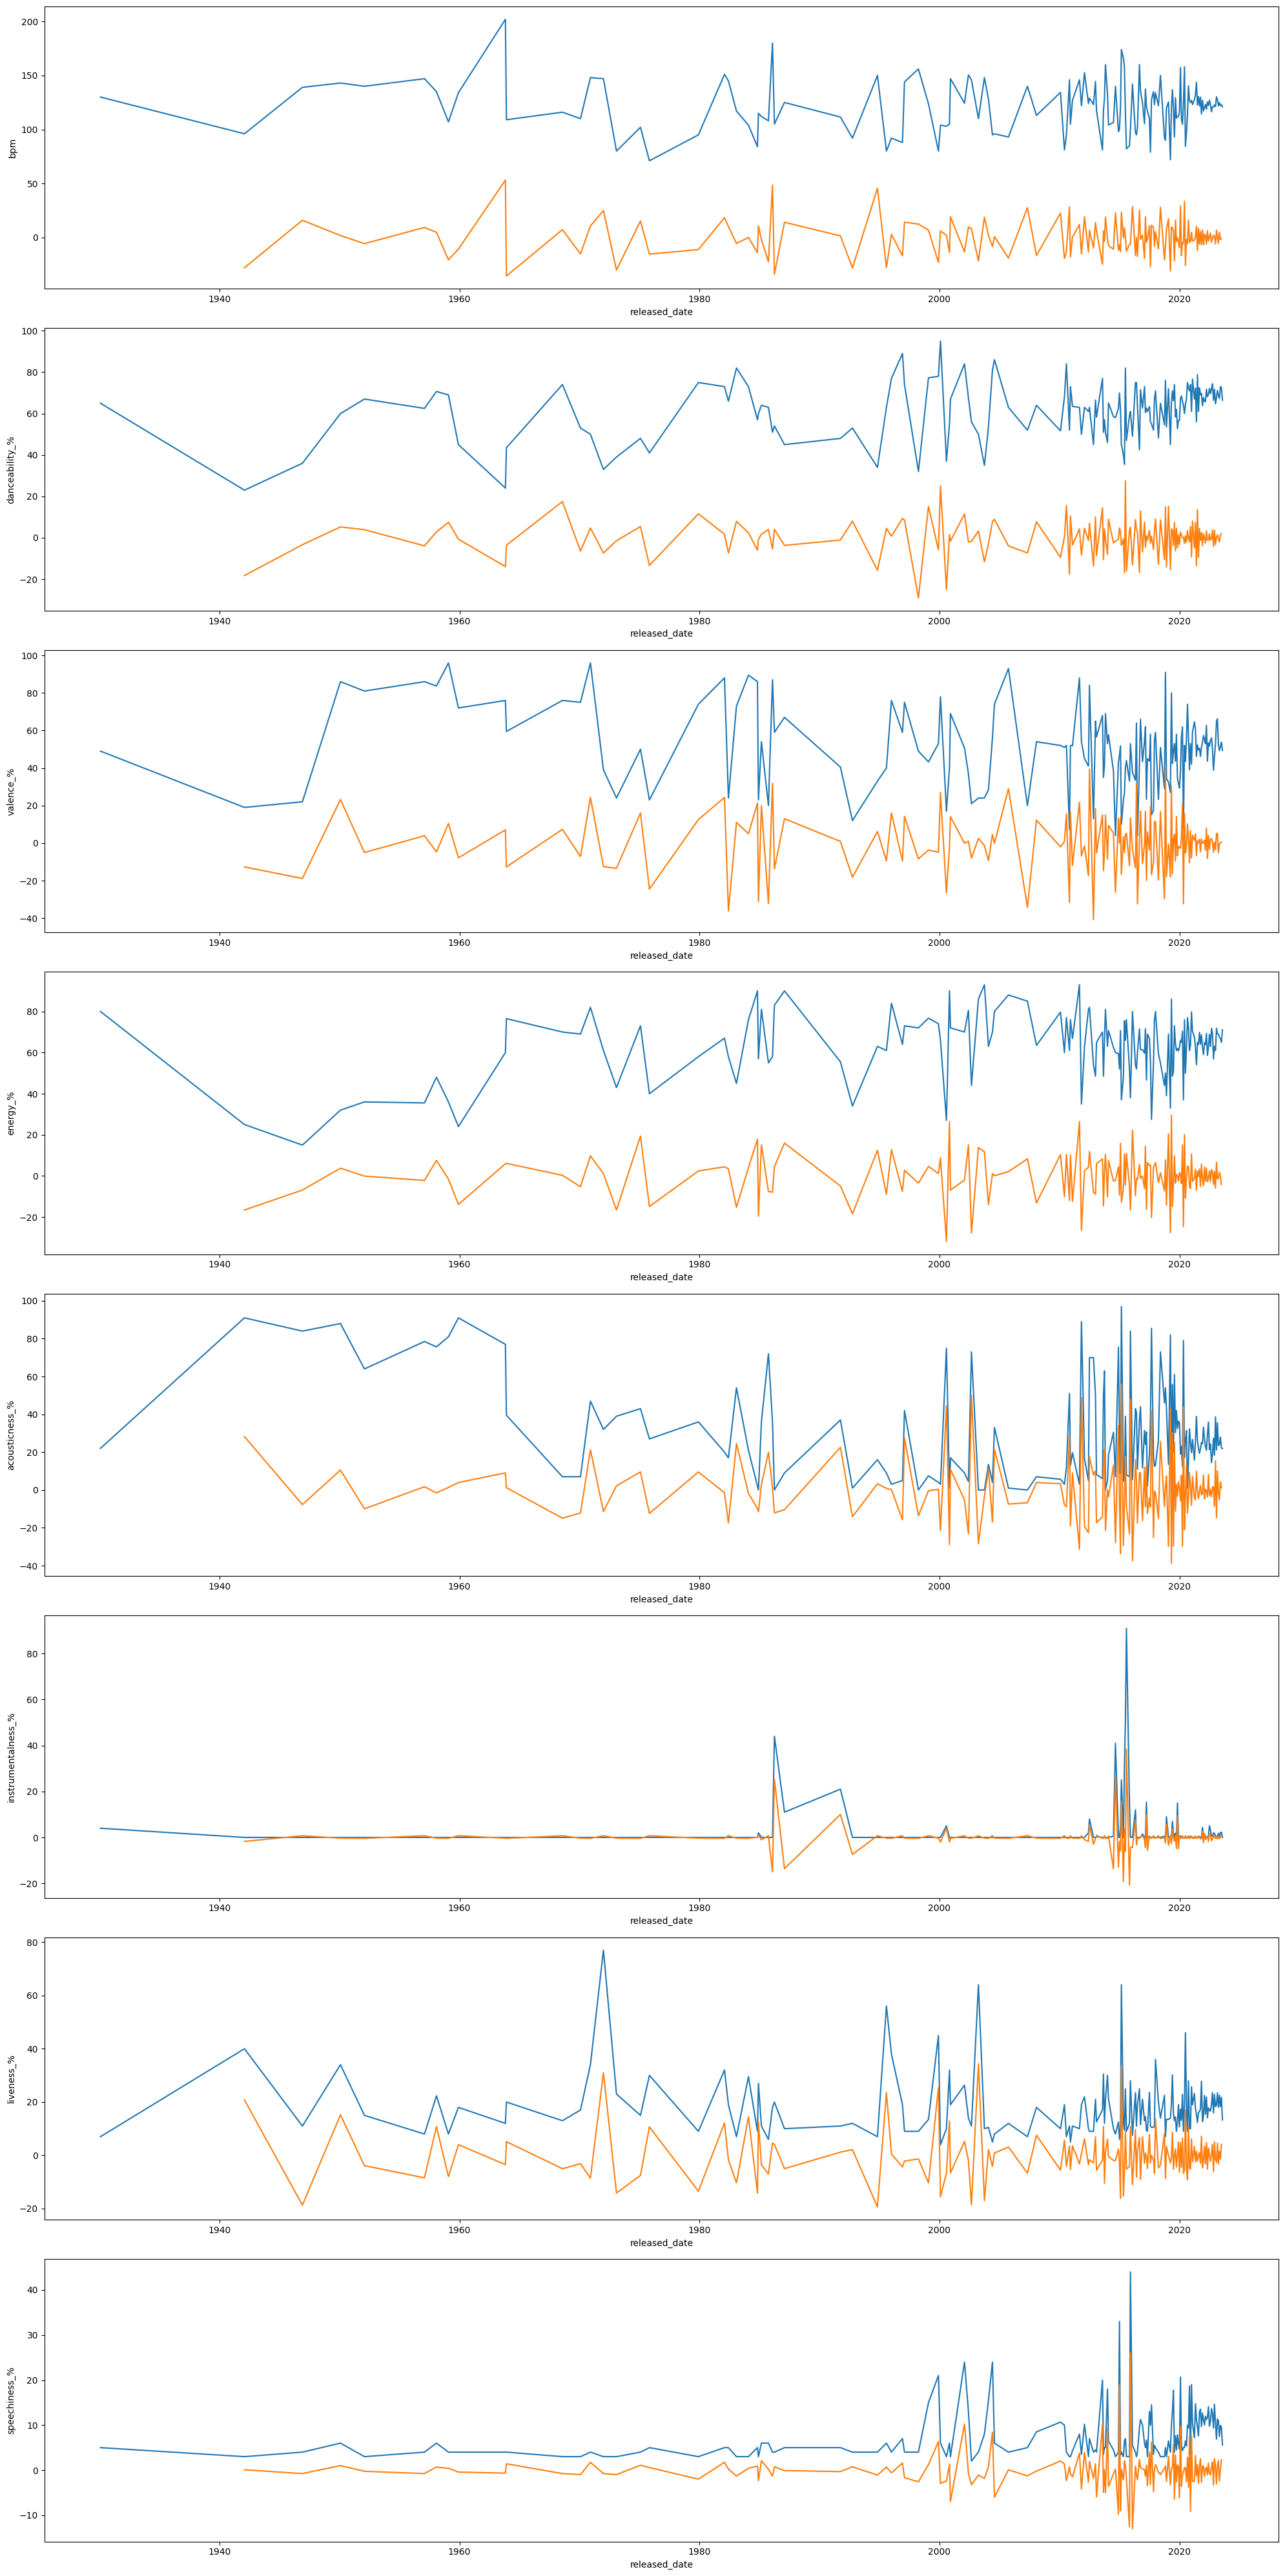

In [19]:
residual_bpm = decomposition_bpm.resid
residual_danceability = decomposition_danceability.resid
residual_valence = decomposition_valence.resid
residual_energy = decomposition_energy.resid
residual_acousticness = decomposition_acousticness.resid
residual_instrumentalness = decomposition_instrumentalness.resid
residual_liveness = decomposition_liveness.resid
residual_speechiness = decomposition_speechiness.resid

fig, ax = plt.subplots(8, 1, figsize = (20, 40))

sns.lineplot(ax = ax[0], data = spotify_resampled_monthly, x = 'released_date', y = 'bpm')
sns.lineplot(ax = ax[0], data = residual_bpm)
sns.lineplot(ax = ax[1], data = spotify_resampled_monthly, x = 'released_date', y = 'danceability_%')
sns.lineplot(ax = ax[1], data = residual_danceability)
sns.lineplot(ax = ax[2], data = spotify_resampled_monthly, x = 'released_date', y = 'valence_%')
sns.lineplot(ax = ax[2], data = residual_valence)
sns.lineplot(ax = ax[3], data = spotify_resampled_monthly, x = 'released_date', y = 'energy_%')
sns.lineplot(ax = ax[3], data = residual_energy)
sns.lineplot(ax = ax[4], data = spotify_resampled_monthly, x = 'released_date', y = 'acousticness_%')
sns.lineplot(ax = ax[4], data = residual_acousticness)
sns.lineplot(ax = ax[5], data = spotify_resampled_monthly, x = 'released_date', y = 'instrumentalness_%')
sns.lineplot(ax = ax[5], data = residual_instrumentalness)
sns.lineplot(ax = ax[6], data = spotify_resampled_monthly, x = 'released_date', y = 'liveness_%')
sns.lineplot(ax = ax[6], data = residual_liveness)
sns.lineplot(ax = ax[7], data = spotify_resampled_monthly, x = 'released_date', y = 'speechiness_%')
sns.lineplot(ax = ax[7], data = residual_speechiness)

plt.tight_layout()

plt.show()

#### ***Evaluación de Autocorrelacion***

<Figure size 1200x400 with 0 Axes>

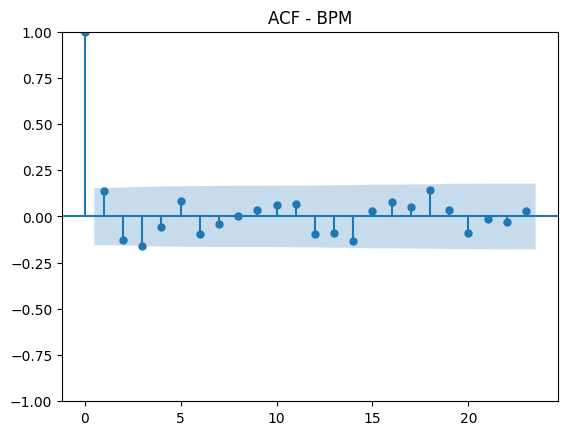

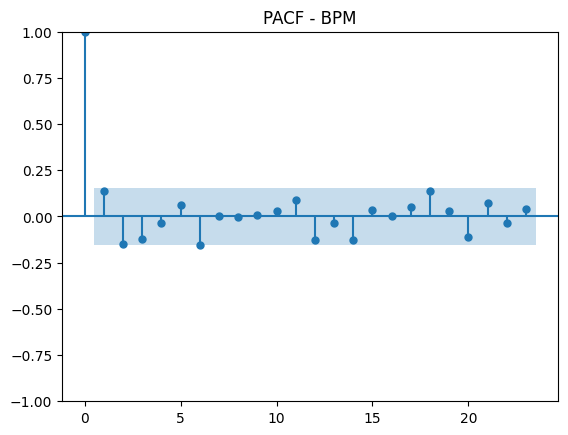

<Figure size 1200x400 with 0 Axes>

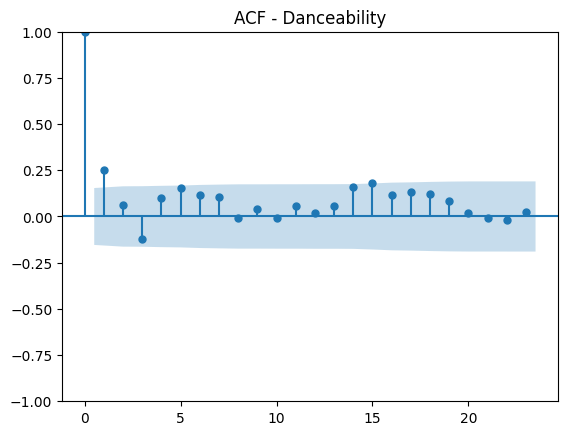

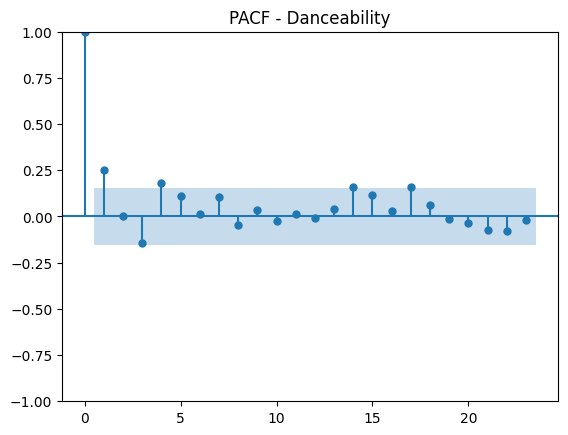

<Figure size 1200x400 with 0 Axes>

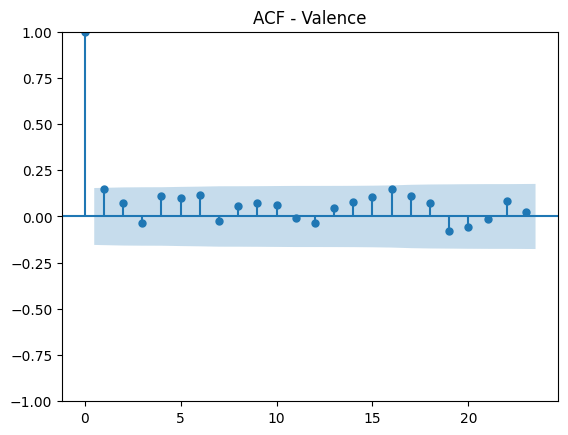

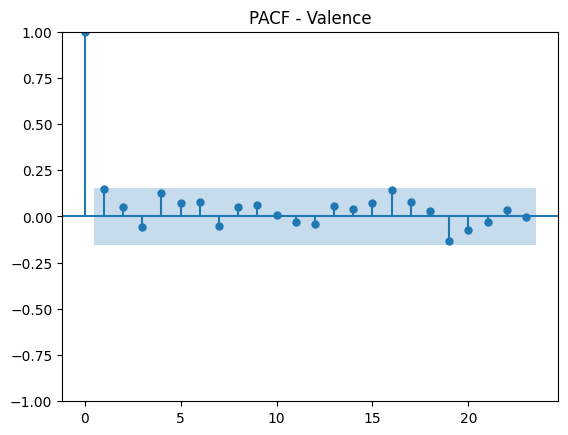

<Figure size 1200x400 with 0 Axes>

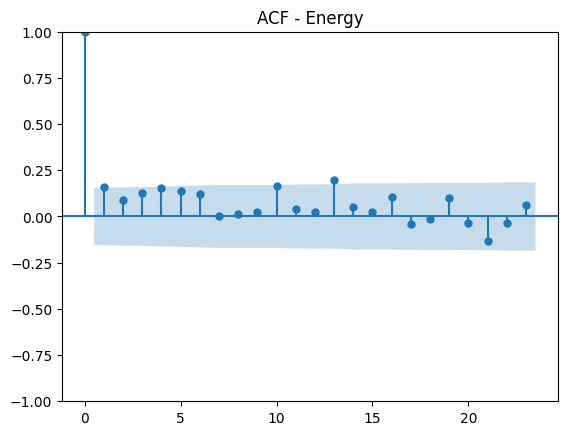

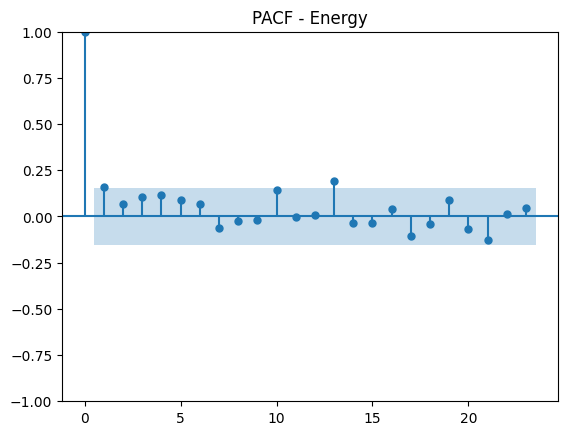

<Figure size 1200x400 with 0 Axes>

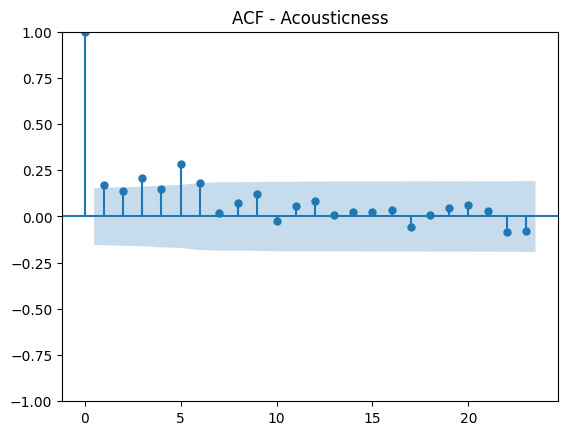

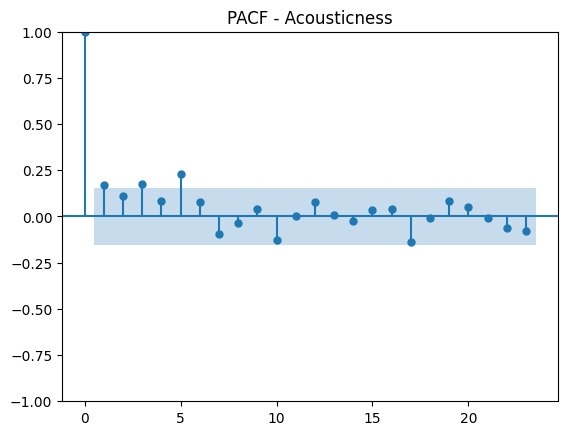

<Figure size 1200x400 with 0 Axes>

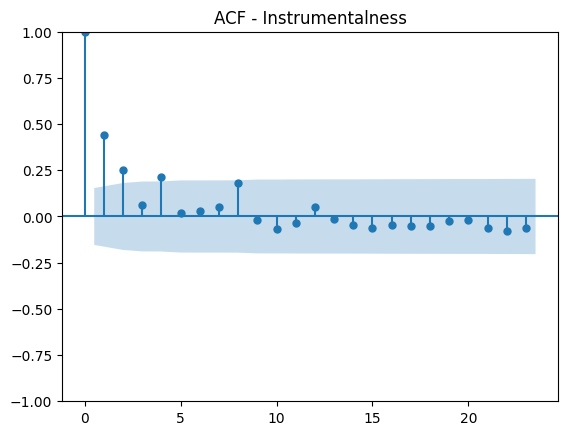

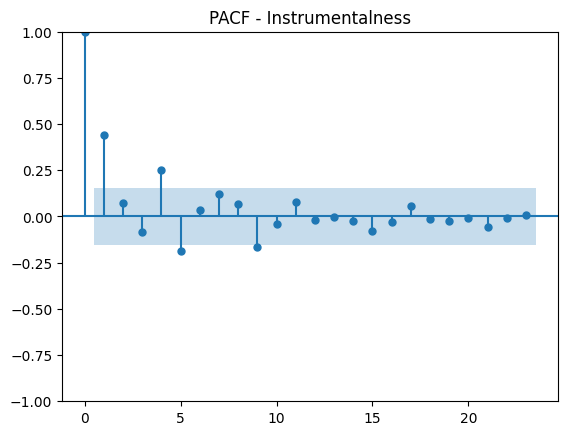

<Figure size 1200x400 with 0 Axes>

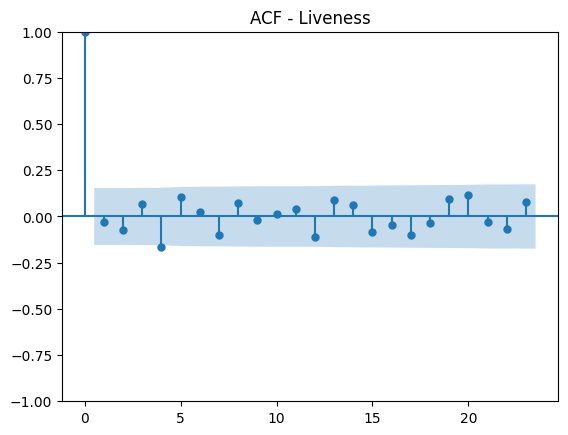

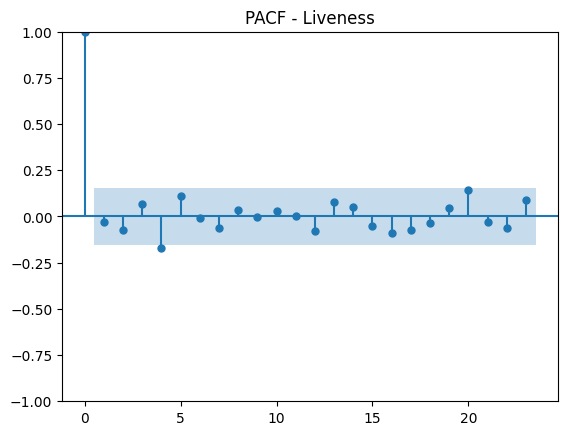

<Figure size 1200x400 with 0 Axes>

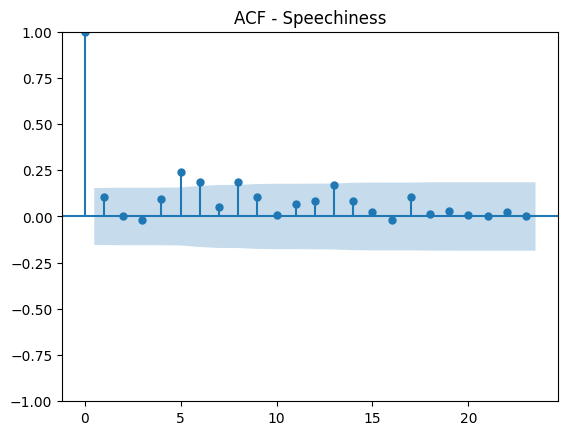

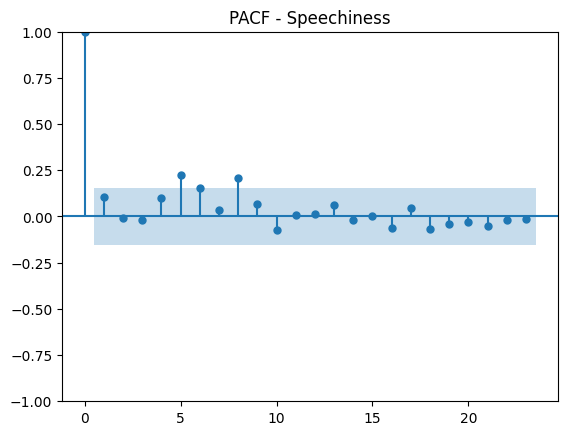

In [20]:
# Autocorrelación y Autocorrelación Parcial para cada variable
#'BPM'
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['bpm'], title='ACF - BPM')
plot_pacf(spotify_resampled_monthly['bpm'], title='PACF - BPM')
plt.show()

# Danceability
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['danceability_%'], title='ACF - Danceability')
plot_pacf(spotify_resampled_monthly['danceability_%'], title='PACF - Danceability')
plt.show()

# Valence
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['valence_%'], title='ACF - Valence')
plot_pacf(spotify_resampled_monthly['valence_%'], title='PACF - Valence')
plt.show()

# Energy
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['energy_%'], title='ACF - Energy')
plot_pacf(spotify_resampled_monthly['energy_%'], title='PACF - Energy')
plt.show()

# Acousticness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['acousticness_%'], title='ACF - Acousticness')
plot_pacf(spotify_resampled_monthly['acousticness_%'], title='PACF - Acousticness')
plt.show()

# Instrumentalness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['instrumentalness_%'], title='ACF - Instrumentalness')
plot_pacf(spotify_resampled_monthly['instrumentalness_%'], title='PACF - Instrumentalness')
plt.show()

# Liveness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['liveness_%'], title='ACF - Liveness')
plot_pacf(spotify_resampled_monthly['liveness_%'], title='PACF - Liveness')
plt.show()

# Speechiness
plt.figure(figsize=(12, 4))
plot_acf(spotify_resampled_monthly['speechiness_%'], title='ACF - Speechiness')
plot_pacf(spotify_resampled_monthly['speechiness_%'], title='PACF - Speechiness')
plt.show()


### **Creación y Evaluación del Modelo**

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Generar los modelos ARIMA para cada variable

# BPM'
order_bpm = (0, 0, 1)
model_bpm = ARIMA(spotify_resampled_monthly['bpm'], order=order_bpm)
results_bpm = model_bpm.fit()
print(results_bpm.summary())

# Danceability
order_danceability = (3, 0, 2)
model_danceability = ARIMA(spotify_resampled_monthly['danceability_%'], order=order_danceability)
results_danceability = model_danceability.fit()
print(results_danceability.summary())

# Valence
order_valence = (0, 0, 7)
model_valence = ARIMA(spotify_resampled_monthly['valence_%'], order=order_valence)
results_valence = model_valence.fit()
print(results_valence.summary())

# Energy
order_energy = (12, 0, 4)
model_energy = ARIMA(spotify_resampled_monthly['energy_%'], order=order_energy)
results_energy = model_energy.fit()
print(results_energy.summary())

# Acousticness
order_acousticness = (2, 0, 1)
model_acousticness = ARIMA(spotify_resampled_monthly['acousticness_%'], order=order_acousticness)
results_acousticness = model_acousticness.fit()
print(results_acousticness.summary())

# Instrumentalness
order_instrumentalness = (6, 0, 4)
model_instrumentalness = ARIMA(spotify_resampled_monthly['instrumentalness_%'], order=order_instrumentalness)
results_instrumentalness = model_instrumentalness.fit()
print(results_instrumentalness.summary())

# Liveness
order_liveness = (3, 0, 11)
model_liveness = ARIMA(spotify_resampled_monthly['liveness_%'], order=order_liveness)
results_liveness = model_liveness.fit()
print(results_liveness.summary())

# Speechiness
order_speechiness = (7, 0, 12)
model_speechiness = ARIMA(spotify_resampled_monthly['speechiness_%'], order=order_speechiness)
results_speechiness = model_speechiness.fit()
print(results_speechiness.summary())

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

                               SARIMAX Results                                
Dep. Variable:                    bpm   No. Observations:                  162
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -729.327
Date:                Fri, 22 Dec 2023   AIC                           1464.654
Time:                        20:53:55   BIC                           1473.917
Sample:                             0   HQIC                          1468.415
                                - 162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.9581      2.050     59.014      0.000     116.941     124.975
ma.L1          0.1742      0.077      2.255      0.024       0.023       0.326
sigma2       476.2482     47.388     10.050      0.0

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

                               SARIMAX Results                                
Dep. Variable:               energy_%   No. Observations:                  162
Model:                ARIMA(12, 0, 4)   Log Likelihood                -651.359
Date:                Fri, 22 Dec 2023   AIC                           1338.719
Time:                        20:53:56   BIC                           1394.295
Sample:                             0   HQIC                          1361.284
                                - 162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.7771      3.809     16.479      0.000      55.311      70.243
ar.L1          1.0118      0.180      5.622      0.000       0.659       1.365
ar.L2         -0.7636      0.165     -4.630      0.0

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

                               SARIMAX Results                                
Dep. Variable:     instrumentalness_%   No. Observations:                  162
Model:                 ARIMA(6, 0, 4)   Log Likelihood                -576.103
Date:                Fri, 22 Dec 2023   AIC                           1176.205
Time:                        20:53:57   BIC                           1213.256
Sample:                             0   HQIC                          1191.248
                                - 162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7464      3.213      0.855      0.393      -3.552       9.044
ar.L1          0.1964     10.171      0.019      0.985     -19.739      20.132
ar.L2          0.0903      6.108      0.015      0.9

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

                               SARIMAX Results                                
Dep. Variable:             liveness_%   No. Observations:                  162
Model:                ARIMA(3, 0, 11)   Log Likelihood                -610.855
Date:                Fri, 22 Dec 2023   AIC                           1253.710
Time:                        20:53:59   BIC                           1303.111
Sample:                             0   HQIC                          1273.767
                                - 162                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7810      1.405     12.657      0.000      15.027      20.535
ar.L1         -0.1078      4.086     -0.026      0.979      -8.116       7.900
ar.L2         -0.4058      2.714     -0.150      0.8

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


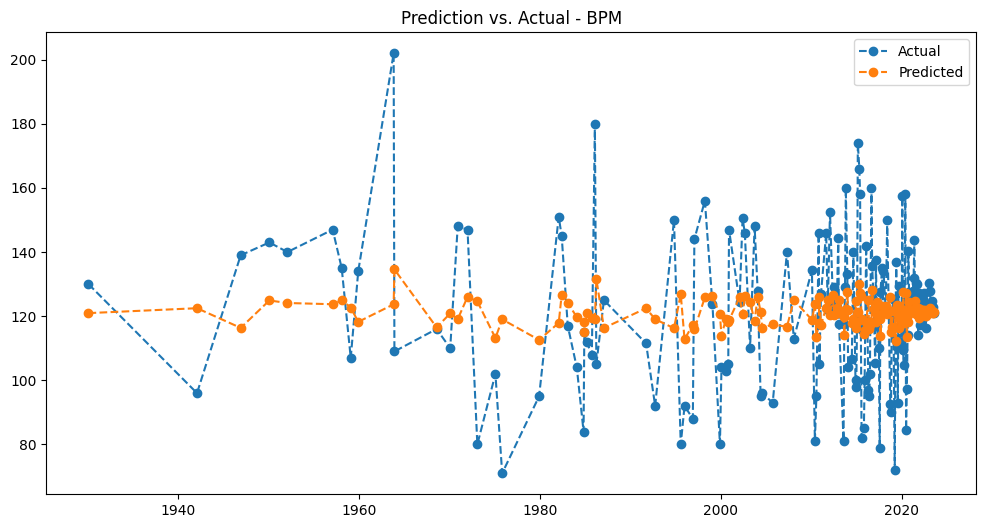

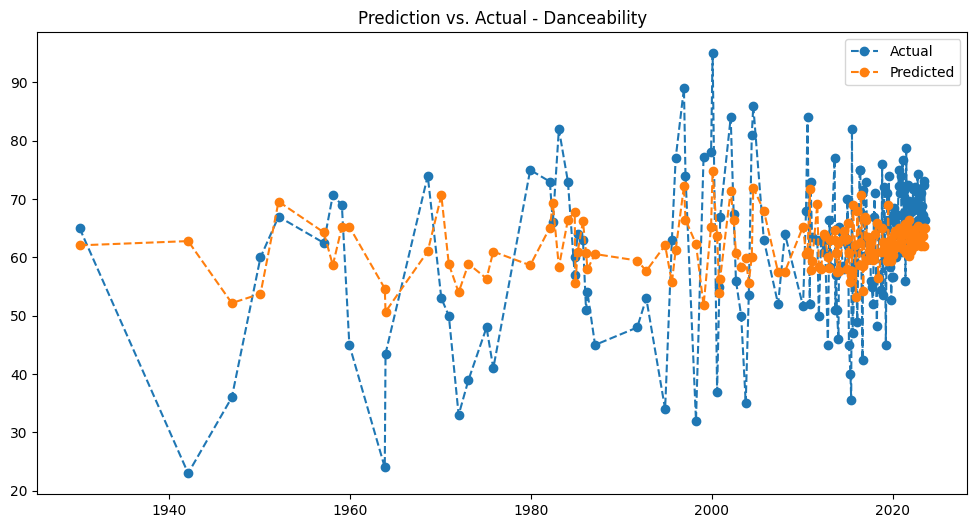

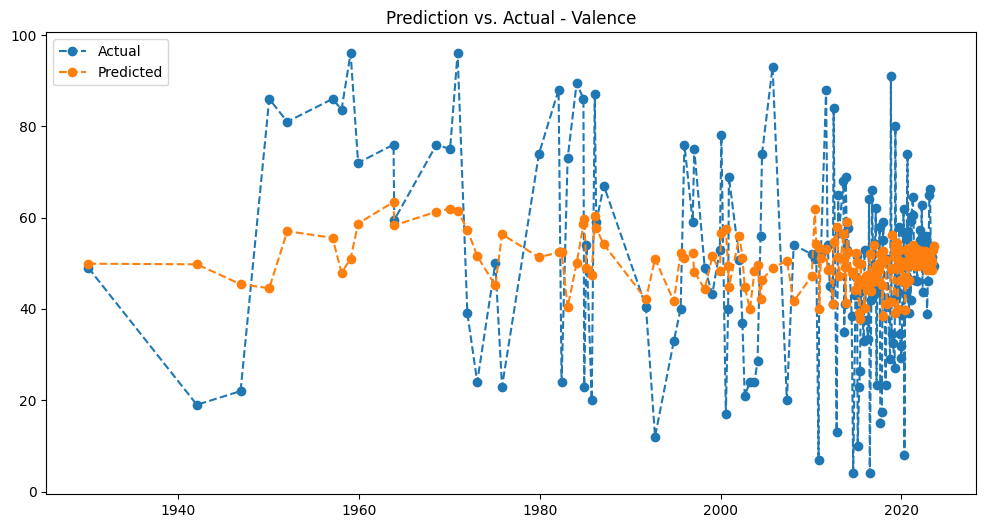

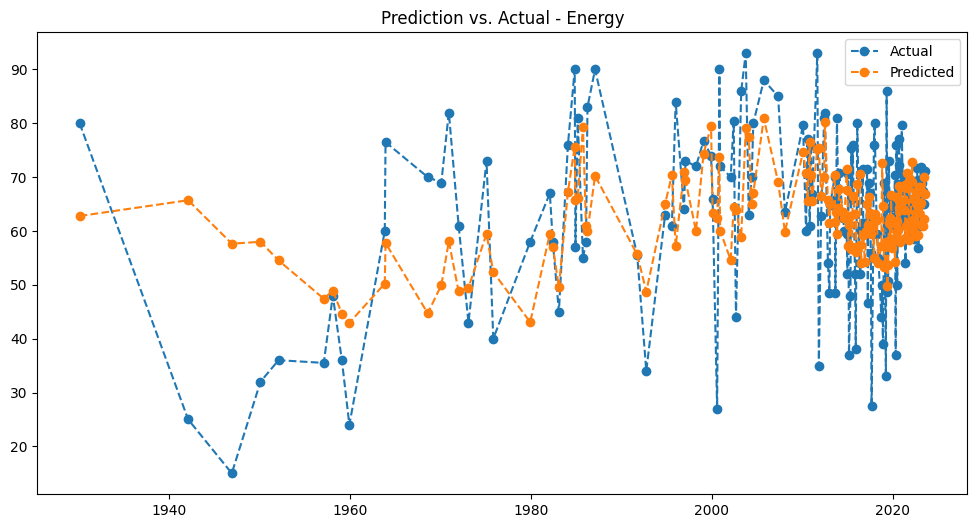

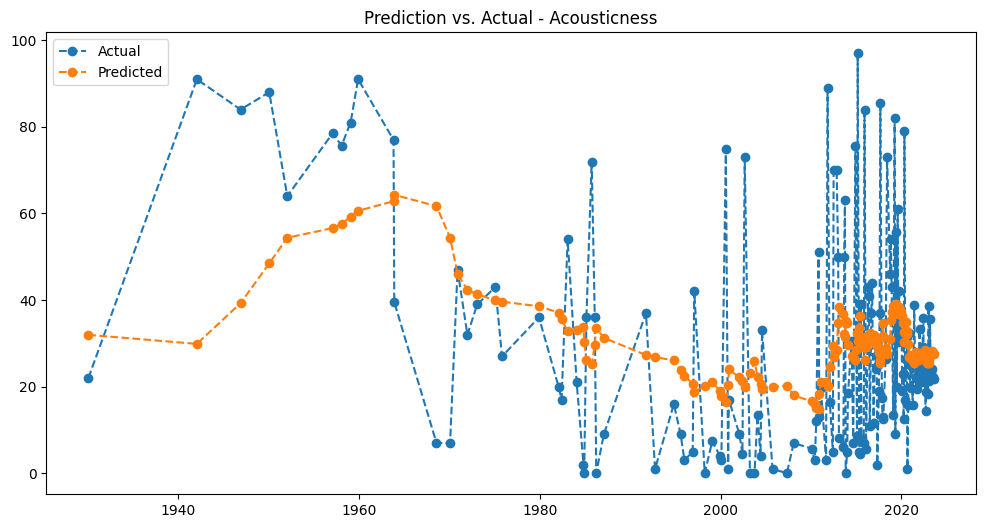

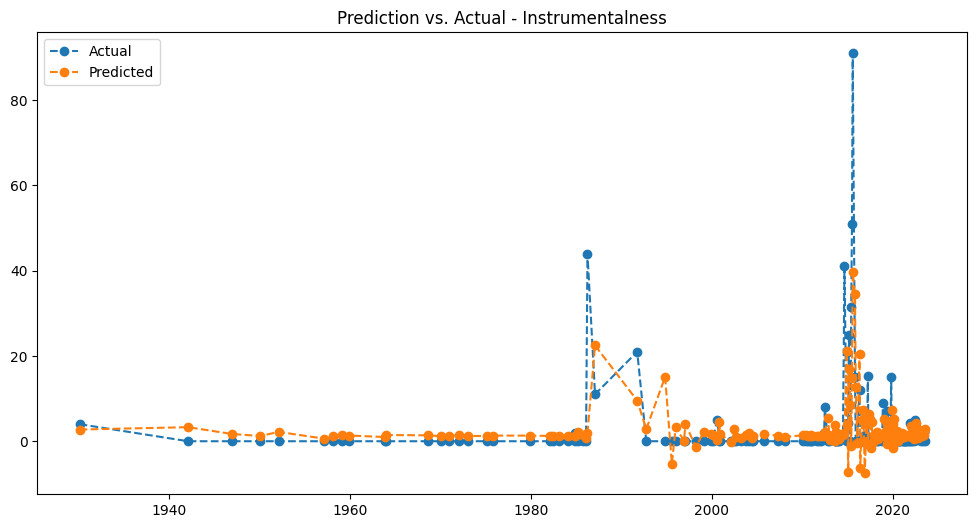

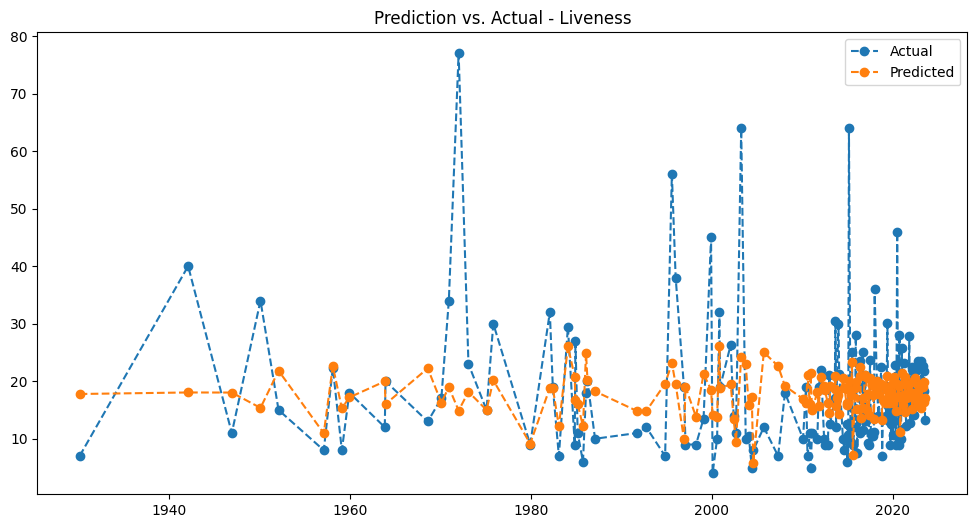

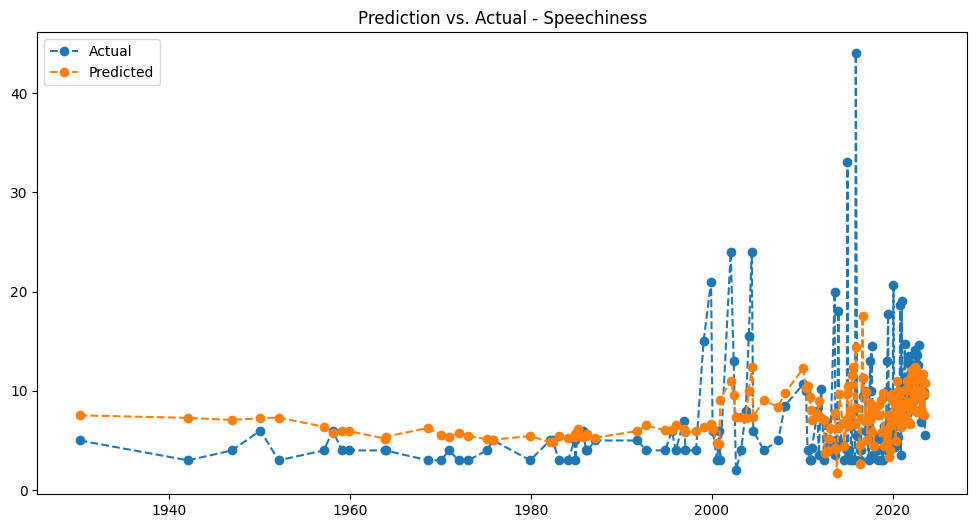

In [22]:
# Assuming spotify_resampled_monthly is your DataFrame with resampled monthly data

# Predicción vs. Actual for 'BPM'
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['bpm'], label='Actual', linestyle='--', marker='o')
plt.plot(results_bpm.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. BPM')
plt.legend()
plt.show()

# Repeat for other variables
# Danceability
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['danceability_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_danceability.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Danzabilidad')
plt.legend()
plt.show()

# Valence
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['valence_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_valence.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Positividad')
plt.legend()
plt.show()

# Energy
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['energy_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_energy.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Energía')
plt.legend()
plt.show()

# Acousticness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['acousticness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_acousticness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Acústica')
plt.legend()
plt.show()

# Instrumentalness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['instrumentalness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_instrumentalness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Instrumentalidad')
plt.legend()
plt.show()

# Liveness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['liveness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_liveness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. En Vivo')
plt.legend()
plt.show()

# Speechiness
plt.figure(figsize=(12, 6))
plt.plot(spotify_resampled_monthly['speechiness_%'], label='Actual', linestyle='--', marker='o')
plt.plot(results_speechiness.predict(), label='Predicted', linestyle='--', marker='o')
plt.title('Predicción vs. Hablada')
plt.legend()
plt.show()


In [23]:
# Assuming spotify_resampled_monthly is your DataFrame with resampled monthlyspotify_resampled_monthly data

# Model evaluation for 'BPM'
mse_bpm = mean_squared_error(spotify_resampled_monthly['bpm'], results_bpm.predict())
print(f'Mean Squared Error (BPM): {mse_bpm}')

# Repeat for other variables
# Danceability
mse_danceability = mean_squared_error(spotify_resampled_monthly['danceability_%'], results_danceability.predict())
print(f'Mean Squared Error (Danceability): {mse_danceability}')

# Valence
mse_valence = mean_squared_error(spotify_resampled_monthly['valence_%'], results_valence.predict())
print(f'Mean Squared Error (Valence): {mse_valence}')

# Energy
mse_energy = mean_squared_error(spotify_resampled_monthly['energy_%'], results_energy.predict())
print(f'Mean Squared Error (Energy): {mse_energy}')

# Acousticness
mse_acousticness = mean_squared_error(spotify_resampled_monthly['acousticness_%'], results_acousticness.predict())
print(f'Mean Squared Error (Acousticness): {mse_acousticness}')

# Instrumentalness
mse_instrumentalness = mean_squared_error(spotify_resampled_monthly['instrumentalness_%'], results_instrumentalness.predict())
print(f'Mean Squared Error (Instrumentalness): {mse_instrumentalness}')

# Liveness
mse_liveness = mean_squared_error(spotify_resampled_monthly['liveness_%'], results_liveness.predict())
print(f'Mean Squared Error (Liveness): {mse_liveness}')

# Speechiness
mse_speechiness = mean_squared_error(spotddify_resampled_monthly['speechiness_%'], results_speechiness.predict())
print(f'Mean Squared Error (Speechiness): {mse_speechiness}')


Mean Squared Error (BPM): 476.2824327422119
Mean Squared Error (Danceability): 141.94331227375636
Mean Squared Error (Valence): 383.7330790592349
Mean Squared Error (Energy): 187.66710073880319
Mean Squared Error (Acousticness): 542.0705918421933
Mean Squared Error (Instrumentalness): 71.46153277762511
Mean Squared Error (Liveness): 111.29768924777068
Mean Squared Error (Speechiness): 27.46658297717021
